# Feature Selection using Python

Feature selection is a crucial step in machine learning and data preprocessing that involves selecting the most relevant features from a dataset while eliminating redundant or irrelevant ones. It improves model performance, reduces overfitting, enhances interpretability, and decreases training time.

Python provides multiple techniques for feature selection, categorized into:

- Filter Methods

- Wrapper Methods

- Embedded Methods

- Hybrid Methods

## 1. Filter Methods

Filter methods rely on statistical techniques to assess the relevance of features before feeding them into a model. These methods do not depend on a machine learning algorithm.

### 1.1 Univariate Selection (Chi-Square Test)

The Chi-Square test evaluates the independence between each feature and the target variable.

Chi-Square is used in the following cases: 

- When the target variable is categorical
- When you want to reduce the dimensionality - if your dataset has many features, chi-square can help select the most important ones.
- When checking for feature importance - If you need to determine which features are most significant in predicting the target, chi-square provides p-values and scores. Features with low p-values (typically <0.05) are highly relevant

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

y = data.target

# Select top 10 features

chi2_selector = SelectKBest(score_func=chi2, k=10)

X_new = chi2_selector.fit_transform(df, y)

#print("Selected Features:", df.columns[chi2_selector.get_support()])

# Create a table of selected features
selected_features = df.columns[chi2_selector.get_support()]
selected_df = pd.DataFrame({'Selected Features': selected_features})

# Display the table
print(selected_df)


  Selected Features
0       mean radius
1      mean texture
2    mean perimeter
3         mean area
4   perimeter error
5        area error
6      worst radius
7     worst texture
8   worst perimeter
9        worst area


In [140]:
# SelectKBest?

### 1.2 Correlation Matrix

A correlation matrix helps identify highly correlated features to reduce multicollinearity.

Corrrelation analysis is used in the following cases:
- When the target variable is continuous (Regression Problems)
- When checking for redundant or highly correlated features (Multicollinearity)
- When Checking Feature Importance in Linear Models. In linear regression and similar models, features with higher correlation to the target are often more important. Helps in choosing the most relevant predictors.
- Can be used in cases where the target variable is categorical, but the output should be compared with other feature selection methods because the model assumes that all the variables are continuous including the target variable. Can be used as a first step for feature selection in this case.
- It's best suited for numerical features (continuous or ordinal).

#### Types of Correlation used in feature selection:


1. Pearson Correlation (For Linear Relationships)
 - Measures the linear relationship between two continuous variables.

   
Value ranges from -1 to 1:

 - +1 → Strong positive correlation (both increase together).
 - -1 → Strong negative correlation (one increases, the other decreases).
 - 0 → No correlation.
2.  Spearman Correlation (For Ranked/Ordinal Data)
 - Used when variables are ordinal (e.g., survey ratings, education level).
 - Captures monotonic relationships (increasing/decreasing trends).
3. Point-Biserial Correlation (For Binary Target)
 - Used when the target is binary (0/1).
 - Measures the strength of the relationship between numerical features and a binary outcome.


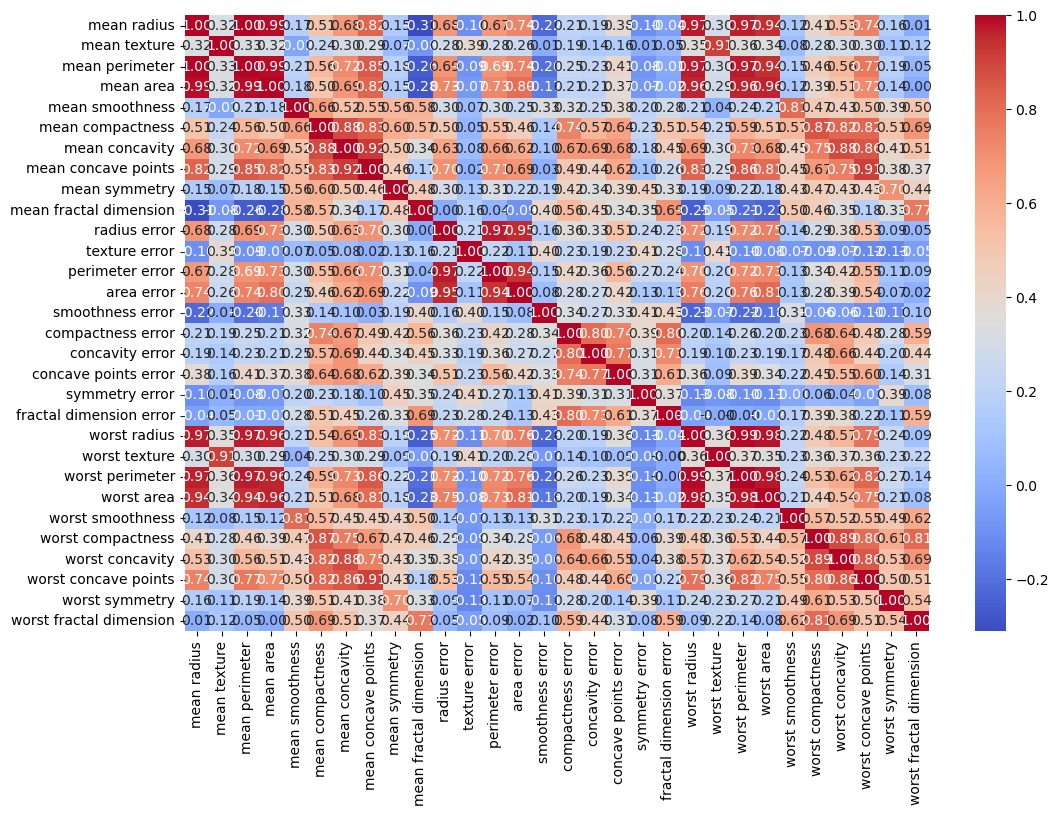

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.show()

### 1.3 Mutual Information

Mutual Information (MI) is a powerful feature selection method that measures the dependency between two variables (how much information one variable provides about another). It is particularly useful for both classification and regression problems, especially when relationships between variables are non-linear and traditional correlation methods (like Pearson) fail.

MI is used: 

- When the relationship between features and the Target is Non-Linear
- When you Have a mix of categorical and continuous features
- When target variable is categorical (Classification Problems)
- When target variable is continuous (Regression Problems) - Mutual Information can also be used for regression, unlike chi-square (which only works for classification).

In [5]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi = mutual_info_classif(df, y)

mi_series = pd.Series(mi, index=df.columns).sort_values(ascending=False)

print(mi_series)

worst perimeter            0.476040
worst area                 0.463727
worst radius               0.454228
mean concave points        0.441911
worst concave points       0.435463
mean perimeter             0.402104
mean concavity             0.373132
mean radius                0.368710
mean area                  0.360725
area error                 0.339322
worst concavity            0.314489
perimeter error            0.277822
radius error               0.248688
worst compactness          0.225801
mean compactness           0.211803
concave points error       0.127568
concavity error            0.117699
worst texture              0.117602
mean texture               0.098821
worst smoothness           0.098196
worst symmetry             0.093743
mean smoothness            0.077709
compactness error          0.075491
worst fractal dimension    0.067339
mean symmetry              0.062750
fractal dimension error    0.037970
smoothness error           0.016664
symmetry error             0

#### Interpreting Mutual Information Scores
 - The higher the MI score, the more important the feature.
 - If MI score = 0, the feature has no influence on the target.
 - If MI score is high, the feature carries significant information about the target.


## 2. Wrapper Methods

Wrapper methods use machine learning models to evaluate feature subsets.

### 2.1 Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a wrapper-based feature selection method that helps identify the most important features by iteratively removing the least significant ones until a desired number of features remains. It is useful when you want to find the optimal subset of features that contribute the most to a predictive model.

RFE is used when:

- When you need an pptimized subset of features - RFE ranks features based on importance and eliminates the least important ones step by step.
It helps in selecting a reduced set of highly relevant features.
- When features are correlated or redundant - Unlike correlation-based selection, RFE actively removes redundant features based on the model’s performance.
- When you have a supervised learning task - Works well for both classification and regression problems.
  

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(df, y)

print("Selected Features:", df.columns[rfe.support_])


Selected Features: Index(['mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


### 2.2 Forward Selection

Forward Selection is a stepwise feature selection technique where we start with no features and iteratively add the most significant ones based on a chosen performance metric (e.g., accuracy, R², AIC).

This method is particularly useful when dealing with a large number of features and helps find the best subset of predictors without including unnecessary ones.

When to use forward selection: 

- When you need a simpler model with only the most relevant features - forward selection adds one feature at a time, so it ensures that only the most useful features are included.Reduces overfitting by eliminating irrelevant predictors.
- When you have a large number of features - If you have many predictors (e.g., 50+ features), forward selection helps in choosing the most informative ones without testing all possible combinations.
- When you Want to improve model interpretability forward selection results in a smaller, optimized feature set, making it easier to interpret relationships between predictors and the target.
- When you want to optimize a performance metric (e.g., AIC, BIC, R²) - You can define a criterion (e.g., accuracy, adjusted R², AIC, BIC), and forward selection will stop when adding more features no longer improves the model.
-  When you’re using regression or classification models - Works for both classification (logistic regression, decision trees, etc.) and regression (linear regression, ridge regression, etc.).

In [127]:
# pip install mlxtend

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

sfs = SFS(LogisticRegression(max_iter=500), forward=True, floating=False, k_features=10, scoring='accuracy', cv=5)

sfs.fit(df, y)

print("Selected Features:", list(sfs.k_feature_names_))



Selected Features: ['mean radius', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'worst texture', 'worst perimeter', 'worst compactness']


### 2.3 Backward Elimination

Backward Elimination is a stepwise feature selection method that starts with all features and iteratively removes the least significant ones based on a chosen performance metric (e.g., p-value, AIC, R²).

This method is useful when we want to simplify the model by removing unnecessary predictors while retaining the most influential ones.

Backward elimination is used:

- When you want a simpler model with the most significant features - Backward elimination removes irrelevant features one by one, keeping only those that significantly affect the target variable. This helps reduce overfitting and improves interpretability.
- When you have a large number of features - if the dataset has many predictors, backward elimination removes weak ones, leaving the most informative subset.
- When you are using regression or classification models -	Works well for both regression (continuous target variable) and classification (categorical target variable). Requires a model that supports statistical significance testing (e.g., Linear Regression, Logistic Regression).
- When you want to improve model performance - by removing irrelevant features, backward elimination can improve generalization and reduce noise.It is useful when using p-values (statistical significance) 

In [44]:
import statsmodels.api as sm

X = sm.add_constant(df)  # Adding constant for intercept

model = sm.OLS(y, X).fit()

print(model.summary())  # Analyze p-values to remove insignificant features


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          6.05e-153
Time:                        07:11:17   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## 3. Embedded Methods

Embedded methods use built-in feature selection mechanisms of machine learning models.

### 3.1 Lasso Regression (L1 Regularization)

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a regularization technique used in regression models. It helps with feature selection by shrinking the coefficients of less important variables to exactly zero, effectively removing them from the model.

Lasso is used when:
- When you have a large number of features (high-dimensional data) - If your dataset has many independent variables, Lasso helps by automatically selecting the most relevant ones. It eliminates irrelevant or redundant features, reducing overfitting.
- When you want to reduce overfitting - Lasso includes a penalty term that prevents overfitting by shrinking coefficients. Helps when dealing with highly correlated features.
- When you want to reduce overfitting - Lasso includes a penalty term that prevents overfitting by shrinking coefficients. Helps when dealing with highly correlated features.
- When features are correlated (multicollinearity) - If two features are highly correlated, Lasso tends to keep only one and shrink the other to zero, preventing redundancy.
- When you have more features than observations (p >> n)  - if the number of features (p) is greater than the number of samples (n), Lasso is effective in selecting the most important ones. 

In [50]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.01)

lasso.fit(df, y)

print("Selected Features:", df.columns[np.abs(lasso.coef_) > 0])


Selected Features: Index(['mean texture', 'mean area', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity'],
      dtype='object')


### 3.2 Ridge Regression (L2 Regularization)

Ridge Regression is a regularization technique used in regression models to prevent overfitting and handle multicollinearity (highly correlated features). Unlike Lasso Regression, Ridge does not remove features but shrinks their coefficients towards zero, making it useful when all features contribute to the model.

Ridge is used: 
- When all features are important - unlike Lasso, which removes some features, Ridge retains all predictors, shrinking their impact instead. This is useful when all variables contribute to the outcome, even if some are weak predictors.
- When you want to reduce overfitting - Ridge adds a penalty term that discourages large coefficients, preventing the model from learning noise in the data. Helps when dealing with small datasets with many predictors.
- When you have more features than observations (p > n) - Ridge performs well when the number of features (p) is greater than the number of observations (n). It stabilizes the regression coefficients, making predictions more reliable.
- When you have highly correlated features (multicollinearity) - in the presence of multicollinearity, standard linear regression (OLS) produces unstable coefficients. Ridge Regression distributes weights among correlated variables rather than arbitrarily eliminating one (like Lasso).

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(df, y)
print("Feature Coefficients:", pd.Series(ridge.coef_, index=df.columns))

Feature Coefficients: mean radius                0.135481
mean texture              -0.009995
mean perimeter            -0.013443
mean area                 -0.000276
mean smoothness            0.375892
mean compactness           3.350408
mean concavity            -1.122572
mean concave points       -1.893305
mean symmetry             -0.117461
mean fractal dimension     0.152986
radius error              -0.475196
texture error             -0.016267
perimeter error            0.003696
area error                 0.001674
smoothness error          -2.578033
compactness error         -0.696184
concavity error            2.472652
concave points error      -2.001859
symmetry error            -1.273172
fractal dimension error   -0.006782
worst radius              -0.174721
worst texture             -0.002623
worst perimeter            0.003557
worst area                 0.000877
worst smoothness          -2.081129
worst compactness         -0.026649
worst concavity           -0.310924
worst 

### 3.3 Elastic Net (Combination of L1 and L2 Regularization)

Elastic Net Regression is a combination of Lasso Regression (L1 penalty) and Ridge Regression (L2 penalty). It balances feature selection and regularization, making it useful when dealing with high-dimensional data and multicollinearity.

Elastic Net is used: 
- When you need both feature selection and regularization - Lasso (L1) removes irrelevant features by setting some coefficients to zero. Ridge (L2) prevents overfitting by shrinking coefficients but keeps all features. Elastic Net combines both, ensuring relevant features are selected while stabilizing the model.
- When standard linear regression fails - if ordinary least squares (OLS) regression gives unstable or large coefficients, Elastic Net stabilizes the model by adding a penalty term.
- When you want to avoid overfitting - The combination of L1 and L2 reduces noise while keeping relevant features, improving generalization.

In [64]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000)
elastic_net.fit(df, y)
print("Selected Features:", df.columns[np.abs(elastic_net.coef_) > 0])

Selected Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst concavity'],
      dtype='object')


### 3.4 Feature Importance using Tree-based Models

Tree-based models, such as Decision Trees, Random Forest, Gradient Boosting (XGBoost, LightGBM, CatBoost), and Extra Trees, provide feature importance scores that indicate how much each feature contributes to the model's predictions. This is a powerful, model-based approach for selecting the most relevant features.

Tree-based models are used:
- When the dataset has non-Linear relationships - Unlike correlation-based or linear models (Lasso, Ridge), tree-based models capture non-linear interactions between features and the target variable.
- When the dataset contains both categorical and continuous features - Tree models automatically handle categorical variables without needing one-hot encoding.
They rank both numerical and categorical features together, making feature selection simpler.
-  When you need an interpretable model - Decision trees and feature importance scores provide interpretable insights into which variables drive predictions.
-  When you have a large number of features - Works well in high-dimensional datasets (e.g., genomic data, text classification). Quickly identifies the most informative features, reducing computation time.

In [70]:
model = RandomForestClassifier()

model.fit(df, y)

importances = pd.Series(model.feature_importances_, index=df.columns)

print(importances.sort_values(ascending=False))


worst perimeter            0.212969
worst area                 0.111512
worst radius               0.103949
mean concave points        0.091027
worst concave points       0.084416
worst concavity            0.047103
mean concavity             0.045542
mean perimeter             0.041903
mean area                  0.040816
mean radius                0.025679
area error                 0.021014
worst texture              0.020335
worst compactness          0.019925
radius error               0.017896
worst smoothness           0.014400
mean texture               0.013993
mean compactness           0.011930
worst symmetry             0.009858
perimeter error            0.008246
worst fractal dimension    0.007843
concavity error            0.007290
mean smoothness            0.006869
concave points error       0.006037
fractal dimension error    0.005189
symmetry error             0.004990
smoothness error           0.004883
mean symmetry              0.004187
compactness error          0

## 4. Hybrid Methods

Hybrid methods combine filter, wrapper, and embedded approaches to optimize feature selection. These methods leverage the advantages of multiple techniques to improve model performance and robustness.

#### 4.1 Boruta Algorithm

The Boruta Algorithm is an advanced feature selection method that identifies all relevant features by leveraging a Random Forest model. Unlike standard feature selection techniques that rank or shrink features, Boruta determines whether each feature is truly important or just noise by comparing them to randomly generated "shadow features."

Boruta is used: 
- When you want to identify all relevant features (not just the best ones) - Unlike Lasso or Tree-Based Importance, which may drop useful but weak features, Boruta retains all relevant features. It ensures that no important variable is wrongly excluded.
- When you have many features (high-dimensional data) - Works well in datasets with hundreds or thousands of variables, such as genomics, finance, or image recognition.
- When there are redundant or correlated features - Unlike Lasso (which picks one correlated feature), Boruta keeps all relevant correlated features, ensuring no important relationships are lost.
- When your features may contain noise - Boruta removes irrelevant and random features that could mislead the model. By introducing shadow features (randomized versions of real features), it checks if a real feature is truly important.
- When you are using tree-based models (Random Forest, XGBoost etc) - Boruta is built on Random Forest, but it can be used with any tree-based model. It handles non-linear relationships better than traditional feature selection methods.

In [136]:
# pip install boruta

In [138]:
# BorutaPy?

In [108]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
boruta = BorutaPy(model, n_estimators='auto', verbose=0)
boruta.fit(df.values, y)
print("Selected Features:", df.columns[boruta.support_])

Selected Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'radius error', 'perimeter error', 'area error',
       'concavity error', 'concave points error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')


# Practice Exercise

### Q1. Apply Univariate Selection

Tasks:

- Load the breast_cancer dataset.

- Select the top 5 most important features using the Chi-Square test.

- Print the selected feature names.

### Q2. Analyze Feature Correlation

Tasks: 

- Load any dataset of your choice.

- Compute the correlation matrix.

- Identify and remove features with correlation higher than 0.85.

### Q3. Implement Recursive Feature Elimination (RFE)

Tasks:

Train a Random Forest classifier on the dataset.

Apply RFE to select the top 8 features.

Print the selected feature names.

### Q4. Feature Selection using Lasso Regression

Tasks:

- Train a Lasso regression model with an appropriate alpha value.

- Identify and print the selected features.

- Compare the results with Ridge regression.

### Q5: Hybrid Feature Selection with Boruta

Tasks: 

- Implement Boruta feature selection using a Random Forest classifier.

- Identify the selected features.

- Compare them with a tree-based feature importance method.